In [ ]:
#Instalaciones de librerias necesarias
pip install numpy pandas seaborn scikit-learn matplotlib

In [13]:
# Cargar y exploraci[on Inicial de los datos
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Cargar el dataset
vehicle_data = pd.read_csv('D:/M-Users/samuel_bolano/Desktop/TAREAS UNAD/ANÁLISIS DE DATOS/Tarea 3/DATASETS/CARS.csv')

# Muestra primeras filas del dataset
print(vehicle_data.head())

# Verifica la información del dataset
print(vehicle_data.info())


                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   i

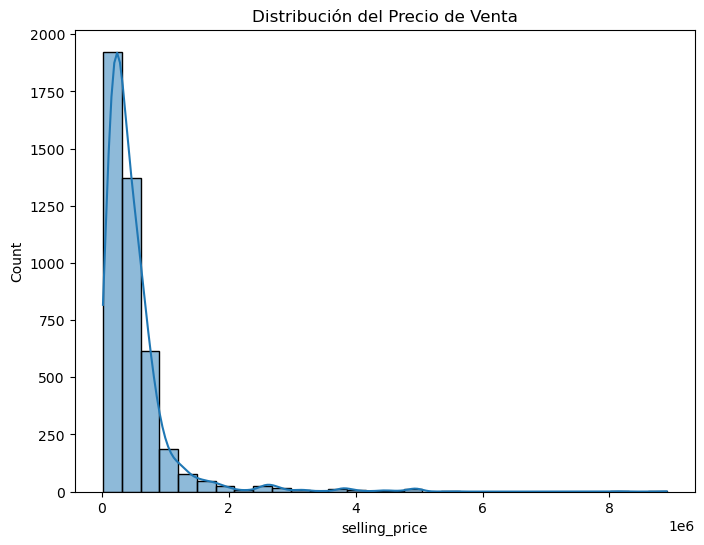

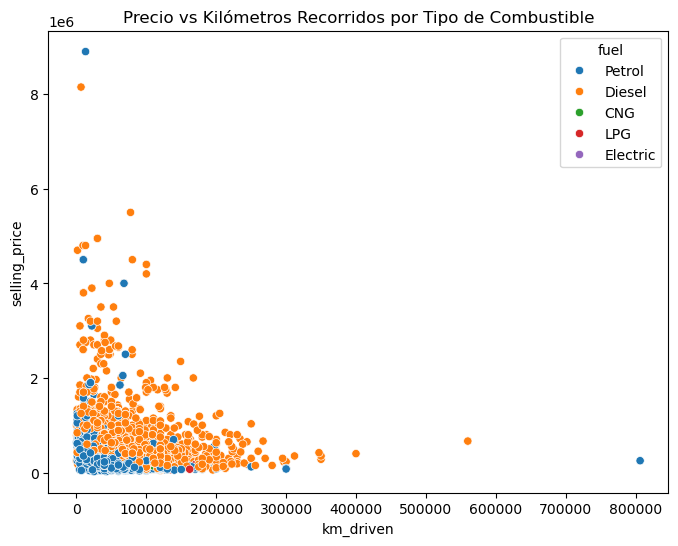

In [23]:
# Histograma para analizar la distribución del precio de venta
plt.figure(figsize=(8, 6))
sns.histplot(vehicle_data['selling_price'], bins=30, kde=True)
plt.title('Distribución del Precio de Venta')
plt.show()

# Gráfico de dispersión para ver la relación entre precio de venta y kilómetros recorridos
plt.figure(figsize=(8, 6))
sns.scatterplot(data=vehicle_data, x='km_driven', y='selling_price', hue='fuel')
plt.title('Precio vs Kilómetros Recorridos por Tipo de Combustible')
plt.show()



In [25]:
# Revisar si hay valores nulos
if vehicle_data.isnull().values.any():
    print("Hay datos vacíos en el dataset.")
else:
    print("No hay datos vacíos en el dataset.")

No hay datos vacíos en el dataset.


In [47]:
# Eliminar filas con valores nulos (o puedes imputarlos según el caso)
vehicle_data = vehicle_data.dropna()

# Convertir variables categóricas en variables dummy
vehicle_data = pd.get_dummies(vehicle_data, columns=['fuel', 'seller_type', 'transmission', 'owner','name'], drop_first=True)

# Separar características y variable objetivo
X = vehicle_data.drop('selling_price', axis=1)
y = vehicle_data['selling_price']

# Dividir los datos en conjunto de entrenamiento y prueba (80% y 20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
#Entrenamiento del modelo

# Inicializar y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Verificar los coeficientes del modelo
print(f'Intercept: {modelo.intercept_}')
print(f'Coeficientes: {modelo.coef_}')

Intercept: -51534863.31385247
Coeficientes: [ 2.62042071e+04 -5.53067044e-01  8.66816692e+04 ...  3.15865851e+06
  5.68498872e+05  7.64924485e+05]


Mean Squared Error: 121717437742.01735
Mean Absolute Error: 123591.41988799247
R2 Score: 0.601149118075366


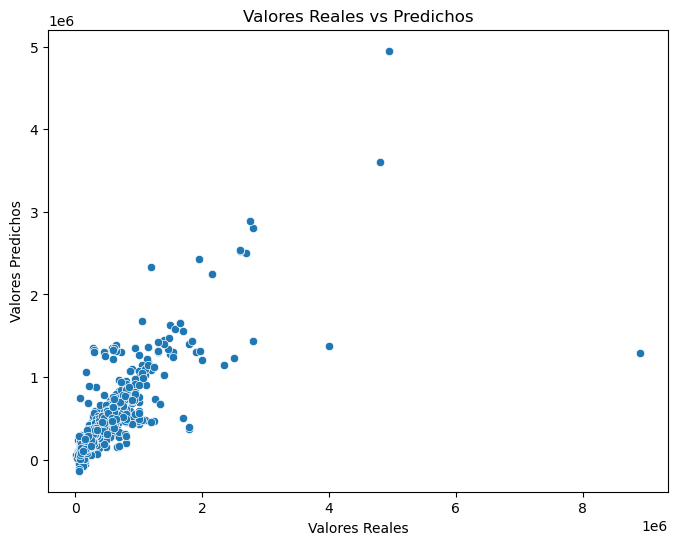

In [51]:
# evaluacion del model

y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

# Gráfico de dispersión entre valores predichos y reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos')
plt.show()
